## Nuevo método numérico: Runge-kutta 4
### Juan S. Hincapié - Carlos Duque-Daza

### Introducción

Los métodos Runge-Kutta (o RK) son una generalización del método básico de Euler hacia adelante. Estos métodos se caracterizan por reemplazar la función $f$ (¡la pendiente!) por un promedio ponderado de pendientes que se hallan en $t_n \leq t \leq t_{n+1}$. Es decir:

$$
    y_{n+1}=y_{n}+h\,(w_{1}k_{1}+\,w_{2}k_{2}+\,\cdots\,+\,w_{m}k_{m})
$$

Donde los pesos $w_{i}$, con $\,i\,=\,1,\,2,\,\cdot\,\cdot\,\cdot\,,\,m$ son constantes que generalmente satisfacen $w_1+w_2+...+w_m=1$, y cada $k_i$ con $\,i\,=\,1,\,2,\,\cdot\,\cdot\,\cdot\,,\,m$ s la función $f$ evaluada en un punto seleccionado $(x, y)$ para el que $t_n \leq t \leq t_{n+1}$

Entonces ¿Cómo son los pesos $w_{i}$ y las pendientes $k_i$ que se usan en RK4? Pues tienen los siguientes valores:

$$
y_{n+1}=y_{n}+\frac{h}{6}(k_{1}+ 2k_{2}+ 2k_{3}+ k_{4})
$$

$$
k_{1} = f(t_{n},y_{n})
$$

$$
k_{2} = f(t_{n}+\frac{1}{2}\Delta t , y_{n}+\frac{1}{2}\Delta t k_1)
$$

$$
k_{3} = f(t_{n}+\frac{1}{2}\Delta t , y_{n}+\frac{1}{2}\Delta t k_2)
$$

$$
k_{4} = f(t_{n}+\Delta t , y_{n}+\Delta t k_3)
$$

¿Y qué significan cada una de estas k's? ¿Qué representan? Son las pendientes evaluadas en tres diferentes puntos del rango temporal $t_n \leq t \leq t_{n+1}$: en $t_n$, $t_n+\frac{1}{2}\Delta t$ y en $t_{n+1}$. La Figura de abajo puede que aclare un poco más el significado:


<img src=https://raw.githubusercontent.com/juhincapiem/ModMat/main/04Newtonianos_RK4_Estabilidad/imagenes/RK4.png alt="Alternative text" width="600"/>

*Figura tomada de http://laplace.us.es/wiki/index.php/Din%C3%A1mica_de_la_part%C3%ADcula_no_vinculada_%28CMR%29


Ahora que el concepto del método numérico está claro, podemos revisar su implementación. 

### Mi primer Runge-Kutta 4

Para practicar la implementación de RK4, es muy buena idea tomar alguno de los modelos matemáticos pasados, ya que conocemos su compartamiento. Por ejemplo, el modelo de vaciado de un tanque:
$$
    \frac{dh}{dt} = \frac{-Q}{A}
$$

Donde el caudal de salida se comporta de la siguiente manera:

$$
    Q = a\sqrt{2gh}
$$

Otra ventaja de probar este método numérico con el vaciado de Tanque, es que conocemos su solución analítica. Esto es útil para calibrar la solución.

$$
\mathbf{h(t)}=\left(\sqrt{\mathbf{h}_{0}}\ -{\frac{\mathbf{C}_{\mathrm{c}}\cdot C_{\mathrm{v}}\cdot\mathbf{a}\cdot{\sqrt{2\ {\mathrm{g}}}}}{2\cdot{\mathbf{A}}}}\ \mathbf{t}\right)^{2}
$$

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Problema 0: definir función para evaluar la pendiente
pendienteH = lambda g,h,a,A: -a*np.sqrt(2*g*h)/A

# Problema 1: definir función para usar Euler
def efAssistant(k, hi, dt):
    hf =  hi + k*dt
    return hf

# Problema 2: definir un RK4
def RK4(info, tiempo, dt):
    # Paso 00: descomprimir info y crear vector hNum
    g = info[0]
    h0 = info[1]
    a = info[2]
    A = info[3]

    hNum = np.zeros(len(tiempo))
    hNum[0] = h0

    for i in range(len(tiempo)-1):
        # Paso 01: evalúo la pendiente en hn, tn
        k1 = pendienteH(g,hNum[i],a,A)

        # Paso 02: Con esa pendiente puedo calcular h*n+1/2
        h2 = efAssistant(k1, hNum[i], dt/2)

        # Paso 03: evalúo la pendiente en h*1/2, tn+1/2
        k2 = pendienteH(g,h2,a,A)

        # Paso 04:  Con esa pendiente puedo calcular h**n+1/2
        h3 = efAssistant(k2, hNum[i], dt/2)

        # Paso 05: evalúo la pendiente en h**1/2, tn+1/2
        k3 = pendienteH(g,h3,a,A)

        # Paso 06:  Con esa pendiente puedo calcular h**n+1/2
        h4 = efAssistant(k3, hNum[i], dt)

        # Paso 07:  Con esa pendiente puedo calcular hn+1, tn+1
        k4 = pendienteH(g,h4,a,A)

        hNum[i+1] = hNum[i] + dt/6 * (k1+2*k2+2*k3+k4)
    return hNum




<p class="alert alert-info"> 
Solucionemos el caso usando también Euler Forward, ¿Para qué? para comparar el error generado por RK4 y EF
</p>

In [31]:
def eulerForward(info, tiempo, dt):
    g = info[0]
    h0 = info[1]
    a = info[2]
    A = info[3]

    hNum = np.zeros(len(tiempo))
    hNum[0] = h0
    for i in range(0, len(tiempo)-1):
        hNum[i+1] = hNum[i] + pendienteH(g,hNum[i],a, A)*dt
    return hNum

In [32]:
# Problema 2: parámetros de control temporal y vector del tiempo
t0 = 0; tf = 40; dt = 0.5
tiempo = np.arange(t0, tf+dt, dt)

# Problema 3: demás parámetros del problema
g = 9.81; h0 = 1.0; a = 1e-2; A = 1.0
info = np.array([g, h0, a, A])

# Problema 4: llamar la función RK4
hNum01 = RK4(info, tiempo, dt)
hNum02 = eulerForward(info, tiempo, dt)

In [33]:
# Problema 5: crear una función para evaluar la solución analítica
solAnalitica = lambda g,h0,a,A, t: (np.sqrt(h0)-a*np.sqrt(2*g)*t/(2*A))**2

tiempoAnalitico = np.arange(t0, tf, 0.01)
hAnalitico = np.zeros(len(tiempoAnalitico))

hAnalitico[:] = solAnalitica(g,h0,a,A, tiempoAnalitico)

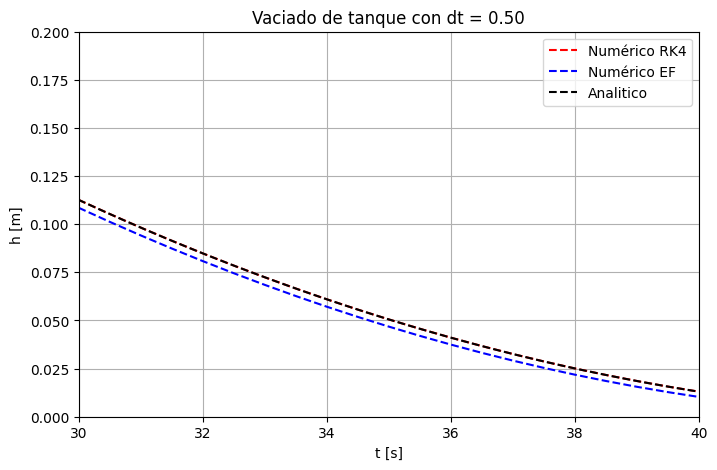

In [34]:
# Problema 6: graficar y comparar ambas soluciones :)
plt.figure(1,figsize=(8,5))
plt.plot(tiempo, hNum01,"--r", label="Numérico RK4")
plt.plot(tiempo, hNum02,"--b", label="Numérico EF")
plt.plot(tiempoAnalitico, hAnalitico, "--k", label="Analitico")
plt.title("Vaciado de tanque con dt = {:.2f}".format(dt))
plt.ylabel("h [m]")
plt.xlabel("t [s]")
plt.legend()
plt.xlim([30,40])
plt.ylim([0.0,0.2])
plt.grid()
plt.show()

<p class="alert alert-info"> 
¿Qué podríamos hacer más corto el código de RK4?
</p>


In [38]:
def RK4Improve(info, tiempo, dt):
    # Paso 00: descomprimir info y crear vector hNum
    g = info[0]
    h0 = info[1]
    a = info[2]
    A = info[3]

    hNum = np.zeros(len(tiempo))
    hNum[0] = h0

    # Creo un vector para almacenar los K's
    k = np.zeros(4)
    for i in range(len(tiempo)-1):
        for j in range(4):
            # Usa el dt/2
            if j == 0:
                k[j] = pendienteH(g,hNum[i],a,A)
                h = efAssistant(k[j], hNum[i], dt/2)
            elif j == 1:
                k[j] = pendienteH(g,h,a,A)
                h = efAssistant(k[j], hNum[i], dt/2)
            # Hace el "disparo" en dt, no en dt/2!!
            elif j == 2:
                k[j] = pendienteH(g,h,a,A)
                h = efAssistant(k[j], hNum[i], dt)
            else:
                k[j] = pendienteH(g,h,a,A)
        hNum[i+1] = hNum[i] + dt/6 * (k[0]+2*k[1]+2*k[2]+k[3])
    return hNum


In [39]:
hNum03 = RK4Improve(info, tiempo, dt)

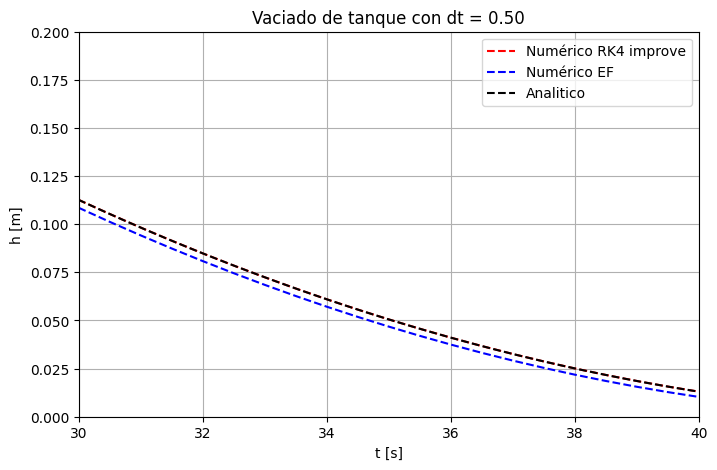

In [40]:
plt.figure(2,figsize=(8,5))
plt.plot(tiempo, hNum03,"--r", label="Numérico RK4 improve")
plt.plot(tiempo, hNum02,"--b", label="Numérico EF")
plt.plot(tiempoAnalitico, hAnalitico, "--k", label="Analitico")
plt.title("Vaciado de tanque con dt = {:.2f}".format(dt))
plt.ylabel("h [m]")
plt.xlabel("t [s]")
plt.legend()
plt.xlim([30,40])
plt.ylim([0.0,0.2])
plt.grid()
plt.show()